## Lab | Inferential statistics


### Instructions

1. It is assumed that the mean systolic blood pressure is `μ = 120 mm Hg`. In the Honolulu Heart Study, a sample of `n = 100` people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg. Is the group significantly different (with respect to systolic blood pressure!) from the regular population?

   - Set up the hypothesis test.
   - Write down all the steps followed for setting up the test.
   - Calculate the test statistic by hand and also code it in Python. It should be 4.76190. We will take a look at how to make decisions based on this calculated value.

2. If you finished the previous question, please go through the code for `principal_component_analysis_example` provided in the `files_for_lab` folder .

In [1]:
# Libraries
import math 
import pandas as pd # manipulate dataframes
import numpy as np # numerical python
import matplotlib.pyplot as plt # viz

# New libraries
import scipy.stats as st # stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Null and Alternative Hypothesis

In [2]:
# Hypotheses
null_hypothesis = "The mean of systolic blood pressure is 120 mg"  # H₀
alt_hypothesis = "The mean systolic blood pressure is not 120 mg"  # H₁

print(f"Null Hypothesis (H₀): {null_hypothesis}")
print(f"Alternate Hypothesis (H₁): {alt_hypothesis}")

Null Hypothesis (H₀): The mean of systolic blood pressure is 120 mg
Alternate Hypothesis (H₁): The mean systolic blood pressure is not 120 mg


### Level of Significance

In [3]:
# Significance level
alpha = 0.05
print(f"Level of Significance (α): {alpha}")

Level of Significance (α): 0.05


### Calculate Test Statistic

In [6]:
# variables
mean_pop = 120
n = 100
sample_mean = 130.1
std = 21.21

In [7]:
# Z-test
z_test = (sample_mean - mean_pop) / (std / (n **0.5))
z_test

4.761904761904759

### Calculte the P-value

In [ ]:
# wrong test
p_value = st.norm.cdf(z_test)  # lower-tailed test
print(f"P-Value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the Null Hypothesis: Significant result.")
else:
    print("Fail to Reject the Null Hypothesis: Not a significant result.")

P-Value: 1.0000
Fail to Reject the Null Hypothesis: Not a significant result.


In [19]:
# Bi-lateral test
p_value = 2 * (1 - st.norm.cdf(abs(z_test)))
print(f"P-Value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the Null Hypothesis: Significant result.")
else:
    print("Fail to Reject the Null Hypothesis: Not a significant result.")


P-Value: 0.0000
Reject the Null Hypothesis: Significant result.


### Calculte the critical value

In [27]:
critical_value = st.norm.ppf(1 - alpha / 2)
critical_value

np.float64(1.959963984540054)

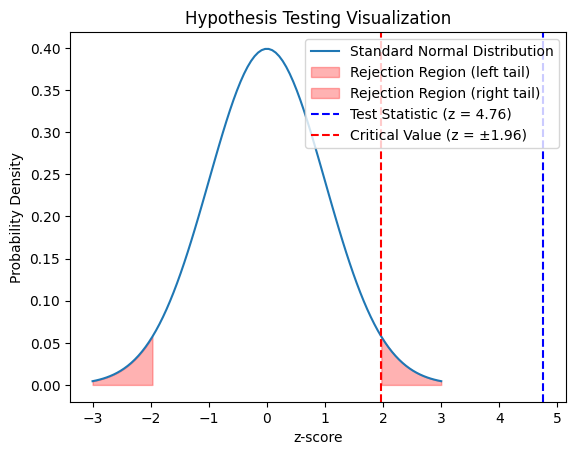

In [26]:
x = np.linspace(-3, 3, 100)
y = st.norm.pdf(x)
plt.plot(x, y, label="Standard Normal Distribution")
plt.fill_between(x, 0, y, where=(x < -critical_value), color='red', alpha=0.3, label='Rejection Region (left tail)')
plt.fill_between(x, 0, y, where=(x > critical_value), color='red', alpha=0.3, label='Rejection Region (right tail)')
plt.axvline(z_test, color='blue', linestyle='--', label=f'Test Statistic (z = {z_test:.2f})')
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value (z = ±{critical_value:.2f})')
plt.title("Hypothesis Testing Visualization")
plt.xlabel('z-score')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()